# PHAS0029 C9: Normal modes of beads connected by springs

<div class = 'alert alert-info'> This notebook contains only instructions and checkpoints. Remember to use text cells to describe the maths/physics of what you're doing and discuss your results, and code comments to annotate the code.
</div>

<div class='alert alert-success'>
    <b> Task 1: Construct the matrix K</b>
    
Write a function called <code>make_matrix</code> which constructs the tridiagonal matrix as set up in the task for an arbitrary number of beads. The function should take only one argument: an array of spring constants $k_i$.
</div>

In [1]:
#importing relevant packages 
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [2]:
def make_matrix(k_i):
    '''
    Function that contructs a tridiagonal matrix for an arbitrary number of beads.
    Input: k_i [a 1D array of spring constants, ki]
    Output: matrix [a 2D array which represents the tridiagonal matrix]
    '''
    #total number of spring constants
    numOfSprings = len(k_i)
    
    #the tridiagonal matrix
    matrix = []
    
    #an array containing the first element of 'k_i' to the penultimate (second last) element of 'k_i'
    slice1 = k_i[0:(numOfSprings-1)]
    
    #an array containing the second element of 'k_i' to the last element of 'k_i'
    slice2 = k_i[1: numOfSprings]
    
    #an array containing the second element of 'k_i' to the penultimate (second last) element of 'k_i'
    slice3 = k_i[1:(numOfSprings-1)]
    
    #constructing the "principle" diagonal matrix
    matrix1 = np.diag(slice1 + slice2)
    
    #constructing the two off-diagonal matrices
    matrix2 = np.diag(-slice3, k=1) 
    matrix3 = np.diag(-slice3, k=-1)
    
    #adding those 3 matrices up to get my final tridiagonal matrix
    matrix = matrix1 + matrix2 + matrix3
    
    #outputing the tridiagonal matrix
    return matrix
    

In [3]:
%run -i c9checkpoint1.py

************
 Well done! All test passed. You can move to the next part of the task.
************


<div class='alert alert-success'>
    <b>Task 2: Calculate angular frequencies</b>
    
Write a function called <code>find_omega</code> which returns angular frequencies for all modes of vibration. Your function should take an array of spring constants and masses of the beads as inputs. It should also use your function <code> make_matrix</code> from above and the <code> numpy.linalg</code> method to find eigenvalues.
</div>


<b> Disclaimer: physics theory and equations used in this text cell was copied and pasted from the "PHAS0029-C9-theory-MatricesEigenvectors.ipynb" python notebook (with relevant amendments included). </b>


Here we have a system compromising of $N$ beads with $N+1$ springs. Which gives us a [tridiagonal] matrix for the spring constants $k_i$:

$$ \mathbf{K} = 
\begin{pmatrix}
k_1 + k_2 & -k_2 & 0 &  & \ldots &  0  \\
-k_2 & k_2 + k_3 & -k_3 & & \ldots &0 \\
 0 & -k_3 & k_3 + k_4 & -k_4 & \ldots & 0 \\
\vdots &  & \ddots & & & \vdots \\
0 & 0 & \ldots &  & -k_N & k_N + k_{N+1} \\
\end{pmatrix}
$$




For a harmonic oscillator, the spring constants are related to the angular frequency by

$$ k = m \omega^2 $$

and hence when we represent this in matrix form, we have

$$ -\mathbf{K}\mathbf{x} = -m \omega^2\mathbf{x} $$

The eigenvalue equation of the form $\mathbf{A} \mathbf{x} = \lambda \mathbf{x}$, where the eigenvectors of the matrix $\mathbf{K}$ will give us the bead displacements for the normal modes of vibration, and the eigenvalues the angular frequency of that mode, i.e. $\lambda = m \omega^2$. 
where $\lambda = eigenvalues $


Therefore, the angular frequency is given by:
 $\omega = \sqrt \frac {\lambda} {m} $
 
 
<b> Disclaimer: physics theory and equations used in this text cell was copied and pasted from the "PHAS0029-C9-theory-MatricesEigenvectors.ipynb" python notebook (with relevant amendments included). </b>

In [4]:
def find_omega(k_i, m_j):
    '''
    Function that calculates the angular frquencies for all modes of vibration.
    Input: k_i [1D array of spring constants], mass_j [1D array of masses of the beads]
    Ouput: angular_freq [1D array of angular frequencies for all modes of vibrations]
    '''
    
    #calculating our tridiagonal matrix
    matrix = make_matrix(k_i)
    
    #calculating the corresponding eigenvector [i.e. the bead displacements for the normal modes of vibration] and eigenvalue[i.e. the angular frequency of     that mode] 
    eigenvalue, eigenvector = la.eigh(matrix)
    
    #calculating the angular frequencies
    angular_freq = np.sqrt(eigenvalue/m_j)
    
    #outputing the angular frequencies for all modes of vibrations
    return angular_freq

In [5]:
%run -i c9checkpoint2.py

************
 Well done! All test passed. You can move to the next part of the task.
************


<div class='alert alert-success'>
    <b>Task 3: Calculate displacement</b>
    
Write a function called <code>find_x</code> which returns displacement of all beads in $n^{th}$ normal mode. Your function should take two inputs: spring constants and mode number as an input and return one array. As always, remember to use your previously defined functions.
    
</div>

In [6]:
def find_x(k_i, modeNumber):
    '''
    Function that calculates the displacement of all beads in nth normal mode.
    Input: k_i [1D array of spring constants], modeNumber [an integer value representing the mode number]
    Output: displacement [1D array of the displacement of all beads in nth normal mode]
    '''
    
    #our tridiagonal matrix
    matrix = make_matrix(k_i)
    
    #calculating the corresponding eigenvector [i.e. the bead displacements for the normal modes of vibration] 
    eigenvector = la.eigh(matrix) [1]
    
    #getting the nth eigenvector
    displacement = eigenvector[:,modeNumber-1]
    
    #outputing the displacement of all beads in nth normal mode
    return displacement

In [7]:
%run -i c9checkpoint3.py

************
 Well done! All test passed. You can move to the next part of the task.
************


<div class='alert alert-success'>
    <b>Task 4: identical beads</b>
    
Use your functions above to produce two plots: one showing the angular frequency o each normal mode as a function of the mode number and one showing the bead displacements as a function of bead number for each of the three lowest normal modes (on a single plot). Assume a system of 25 identical beads with mass $m=1$ and identical springs, each with spring constant $k_i=1$. (_Yet another hint: [np.ones()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html)_ )

    
</div>

Text(0.5, 1.0, 'spectrum of angular eigen frequencies ($\\omega$) against mode number (n)')

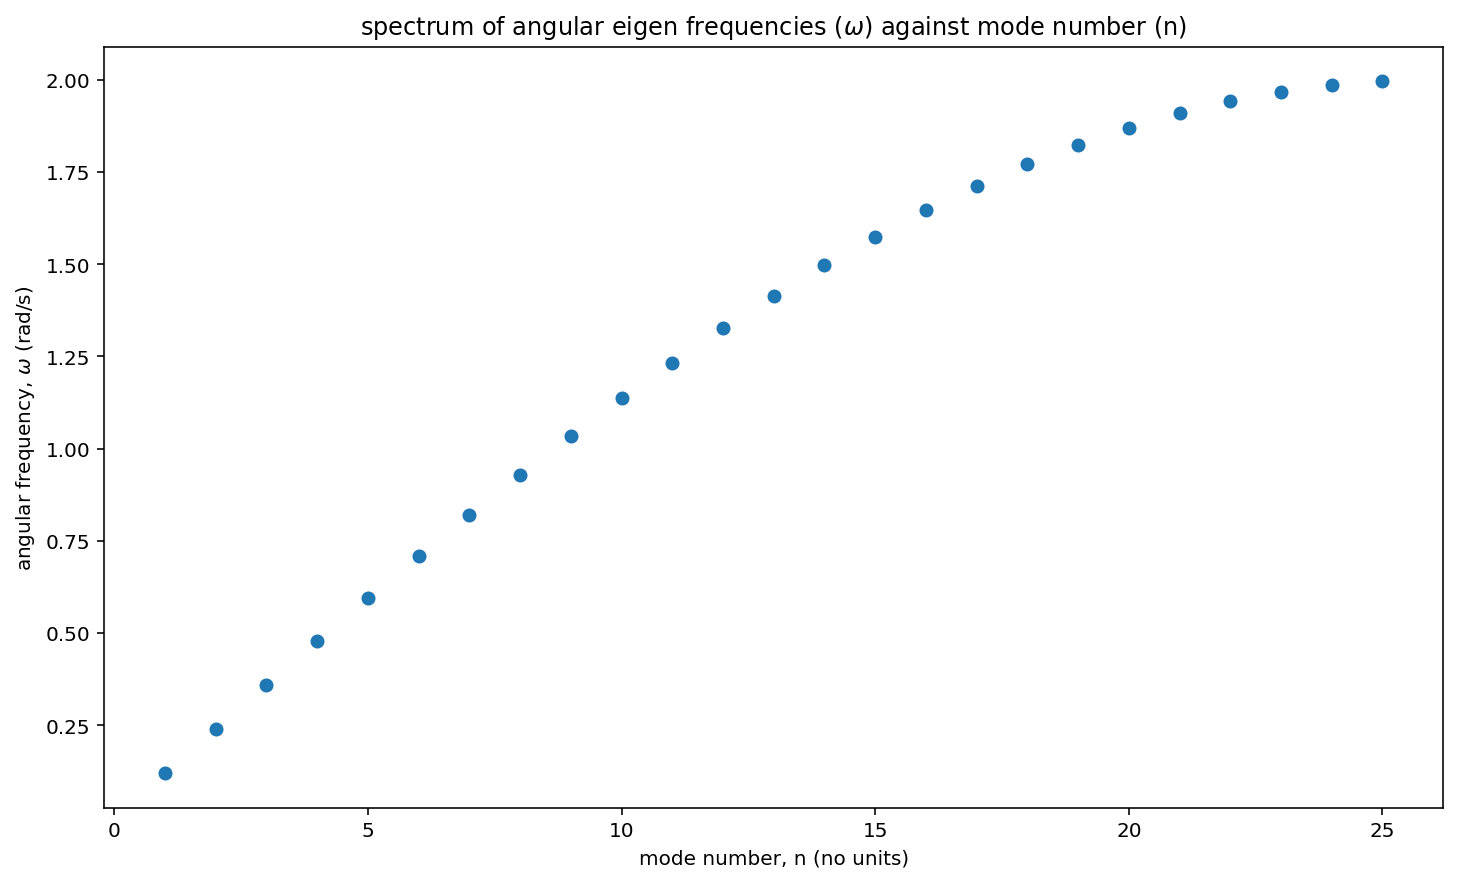

In [8]:
k_i = np.ones(26) #number of spring constants each with k = 1

m_j = np.ones(25) #number of identical beads each with mass =1 


#calculating the angular frequencies of each normal mode
angularFrequencies = find_omega(k_i, m_j)

#mode number
modenumber = np.arange(1,26)

plt.figure()
#angular frequencies plot with x and y variables defined
plt.scatter(modenumber, angularFrequencies)
#x-axis label
plt.xlabel('mode number, n (no units)')
#y-axis label
plt.ylabel('angular frequency, $\omega$ (rad/s)')
#title of the whole plot
plt.title('spectrum of angular eigen frequencies ($\omega$) against mode number (n)')

Text(0.5, 1.0, 'spectrum of angular eigen bead displacement against bead number')

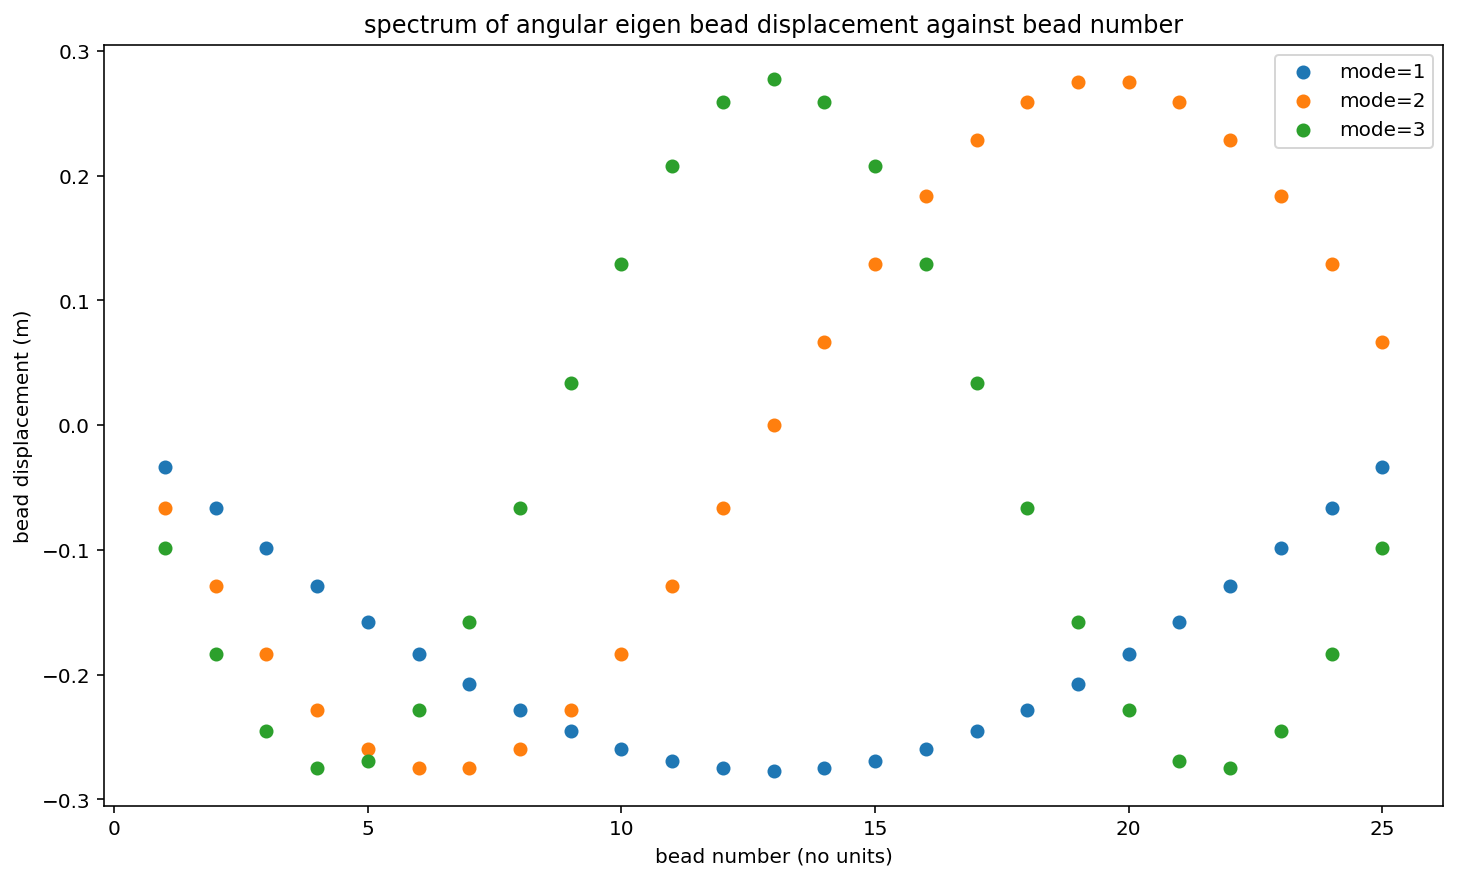

In [9]:
#calculating the bead displacements for the 1st mode
bead_displacement1 = find_x(k_i, 1)

#calculating the bead displacements for the 2nd mode
bead_displacement2 = find_x(k_i, 2)

#calculating the bead displacements for the 3rd mode
bead_displacement3 = find_x(k_i, 3)

#bead number
beadnumber = np.arange(1,26)

#bead displacement plot for first mode
plt.scatter(beadnumber, bead_displacement1, label='mode=1')

#bead displacement plot for 2nd mode
plt.scatter(beadnumber, bead_displacement2, label='mode=2')

#bead displacement plot for 3rd mode
plt.scatter(beadnumber, bead_displacement3, label='mode=3')

#legend for me plots :)
plt.legend()


#x-axis label
plt.xlabel('bead number (no units)')
#y-axis label
plt.ylabel('bead displacement (m)')
#plot title
plt.title('spectrum of angular eigen bead displacement against bead number')

<div class='alert alert-success'>
    <b>Task 5: Increasing k</b>
    
Repeat the plots in Task 4 for a system of 25 identical beads with mass $m=1$but this time with each spring having a spring constant of $k_i=i$  (<i> where "i" is the integer index of the array, NOT $\sqrt{-1}$!</i> ). 
    
Compare the two systems and discuss your results appropriately.

    
</div>

Text(0.5, 1.0, 'spectrum of angular eigen frequencies ($\\omega$) against mode number (n)')

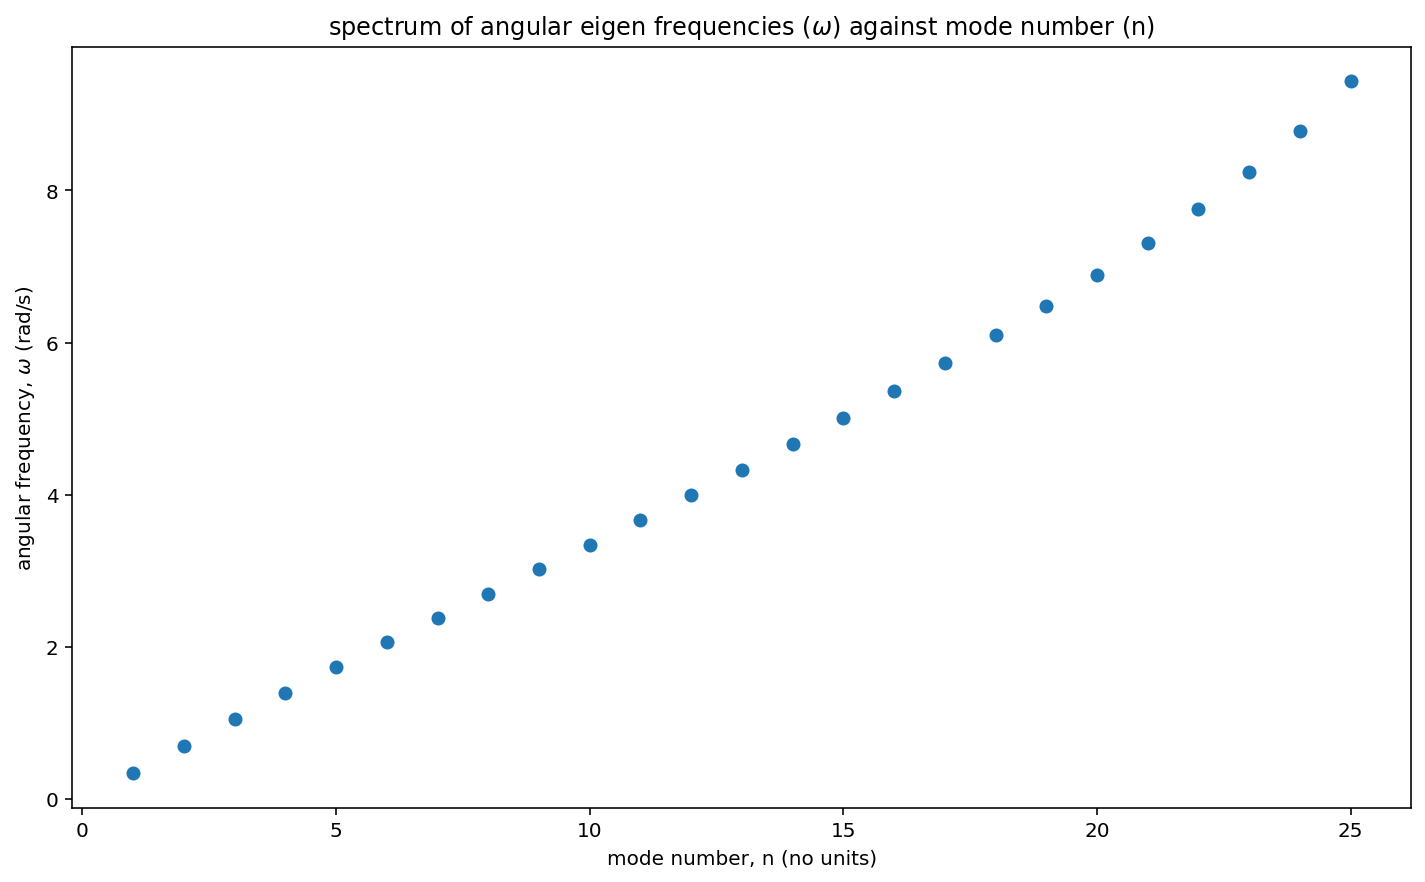

In [10]:
k_i = np.arange(1,27,1) #spring constants with k_i = i [where i = 1, 2, 3, 4...26] (remember that N beads gives N+1 spring constants)

m_j = np.ones(25) #number of identical beads each with mass =1 


#calculating the angular frequencies of each normal mode
angularFrequencies = find_omega(k_i, m_j)

#mode number
modenumber = np.arange(1,26)

plt.figure()
#angular frequencies plot with x and y variables defined
plt.scatter(modenumber, angularFrequencies)
#x-axis label
plt.xlabel('mode number, n (no units)')
#y-axis label
plt.ylabel('angular frequency, $\omega$ (rad/s)')
#title of the whole plot
plt.title('spectrum of angular eigen frequencies ($\omega$) against mode number (n)')

Text(0.5, 1.0, 'spectrum of angular eigen bead displacement against bead number')

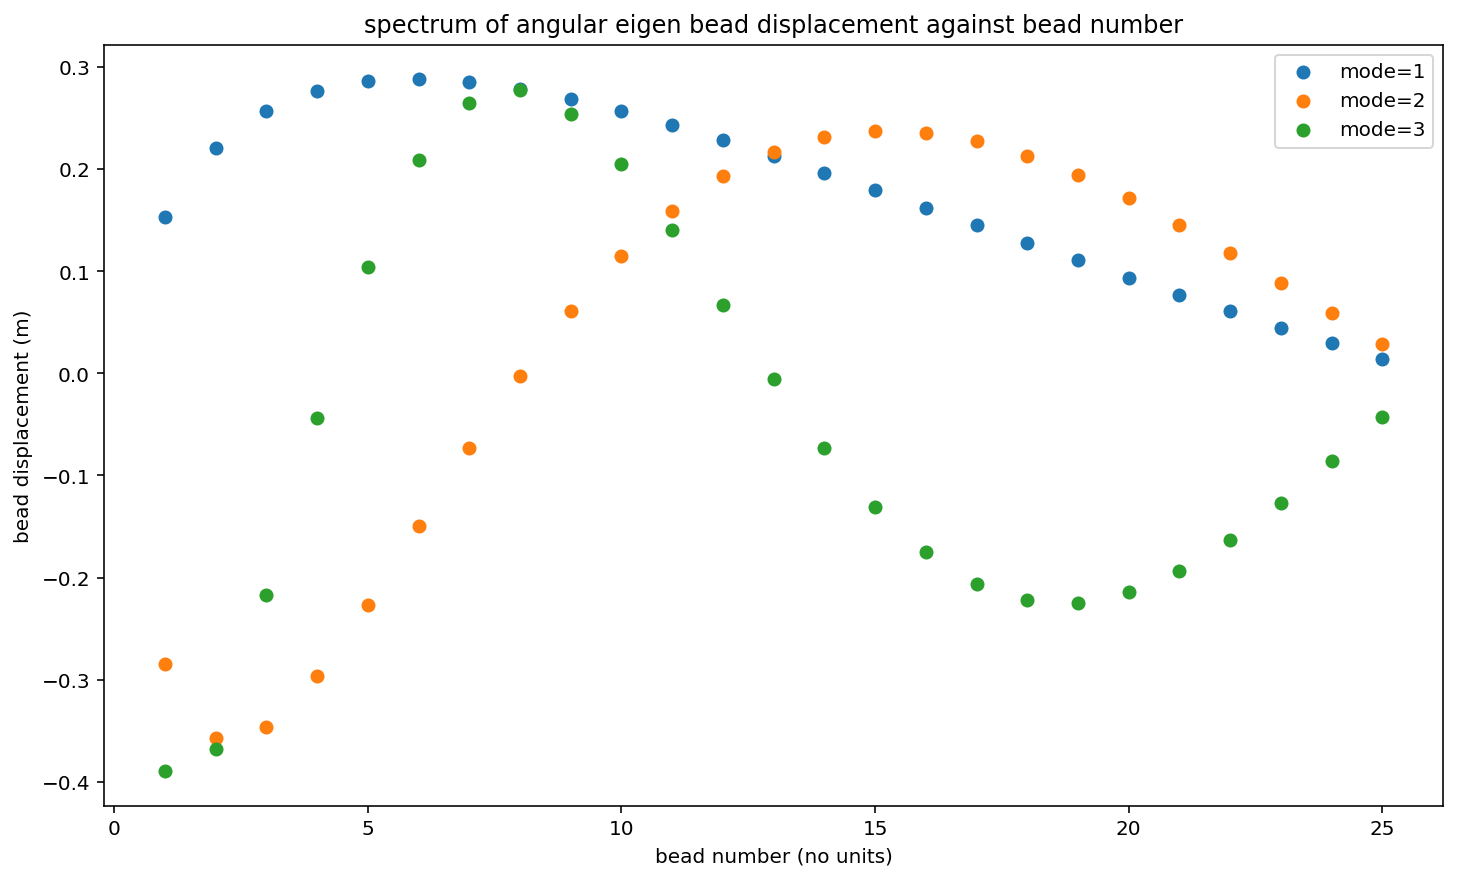

In [11]:
#calculating the bead displacements for the 1st mode
bead_displacement1 = find_x(k_i, 1)

#calculating the bead displacements for the 2nd mode
bead_displacement2 = find_x(k_i, 2)

#calculating the bead displacements for the 3rd mode
bead_displacement3 = find_x(k_i, 3)

#bead number
beadnumber = np.arange(1,26)

#bead displacement plot for first mode
plt.scatter(beadnumber, bead_displacement1, label='mode=1')

#bead displacement plot for 2nd mode
plt.scatter(beadnumber, bead_displacement2, label='mode=2')

#bead displacement plot for 3rd mode
plt.scatter(beadnumber, bead_displacement3, label='mode=3')

#legend for me plots :)
plt.legend()

#x-axis label
plt.xlabel('bead number (no units)')
#y-axis label
plt.ylabel('bead displacement (m)')
#plot title
plt.title('spectrum of angular eigen bead displacement against bead number')

.

<div class='alert alert-success'>
    <b>Bonus task (optional and not graded): Alternating k</b>
    
Try calculating for a system where the strength of the springs alternate between weak and strong, or any other configuration you like!

    
</div>

General quality of plots

 General quality of docstrings and code comments

General quality of text cells